In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [2]:
X,_ = make_blobs(n_samples=100,centers=3,random_state=42)

In [3]:
kmeans = KMeans(n_clusters=3,init='random',random_state=42)

In [4]:
kmeans.fit(X)

c:\Users\venka\AppData\Local\anaconda3\envs\ML\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\venka\AppData\Local\anaconda3\envs\ML\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\venka\AppData\Local\anaconda3\envs\ML\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\venka\AppData\Local\anaconda3\envs\ML\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\venka\AppData\Loc

KMeans(init='random', n_clusters=3, random_state=42)

In [5]:
labels = kmeans.labels_

In [6]:
import plotly.express as px
import pandas as pd

In [7]:
df = pd.DataFrame(X,columns=['x','y'])
df['cluster'] = labels.astype(str)

In [8]:
fig = px.scatter(df,x = 'x',y = 'y',color='cluster',title='K_MEANS')
fig.show()

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import plotly.express as px
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the real-world dataset (Iris dataset)
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Standardizing the dataset
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)
kmeans.fit(df_scaled)
df['cluster'] = kmeans.labels_.astype(str)

# Scatter plot using first two principal features
fig = px.scatter(df, x=iris.feature_names[0], y=iris.feature_names[1], color='cluster', 
                 title='K-Means Clustering on Iris Dataset')
fig.show()


c:\Users\venka\AppData\Local\anaconda3\envs\ML\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\venka\AppData\Local\anaconda3\envs\ML\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\venka\AppData\Local\anaconda3\envs\ML\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\venka\AppData\Local\anaconda3\envs\ML\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\venka\AppData\Loc

In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import plotly.express as px
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Load the real-world dataset (Iris dataset)
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Standardizing the dataset
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)
kmeans.fit(df_scaled)
df['cluster'] = kmeans.labels_.astype(str)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)
df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]

# Scatter plot using PCA components
fig = px.scatter(df, x='pca1', y='pca2', color='cluster', 
                 title='K-Means Clustering on Iris Dataset (PCA Reduced)')
fig.show()

# Evaluate Clustering Performance
silhouette_avg = silhouette_score(df_scaled, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.46


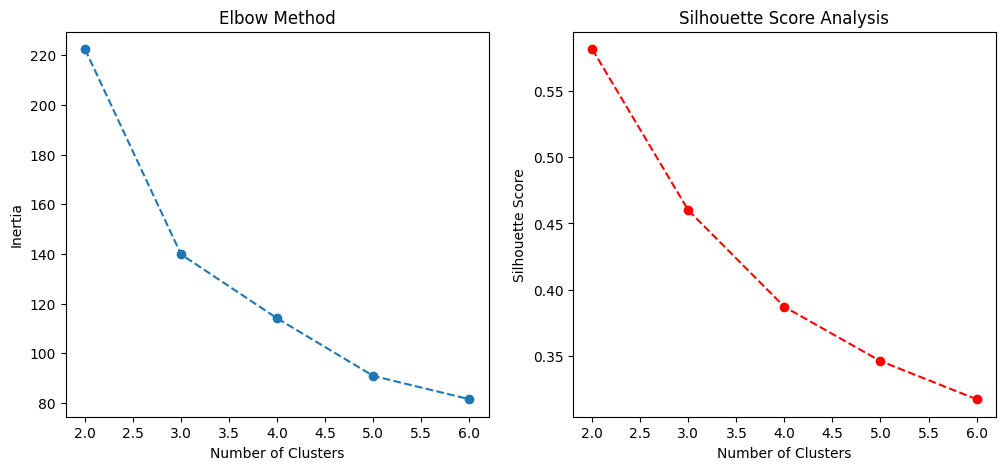

Final K-Means Silhouette Score: 0.46
Gaussian Mixture Model Silhouette Score: 0.48


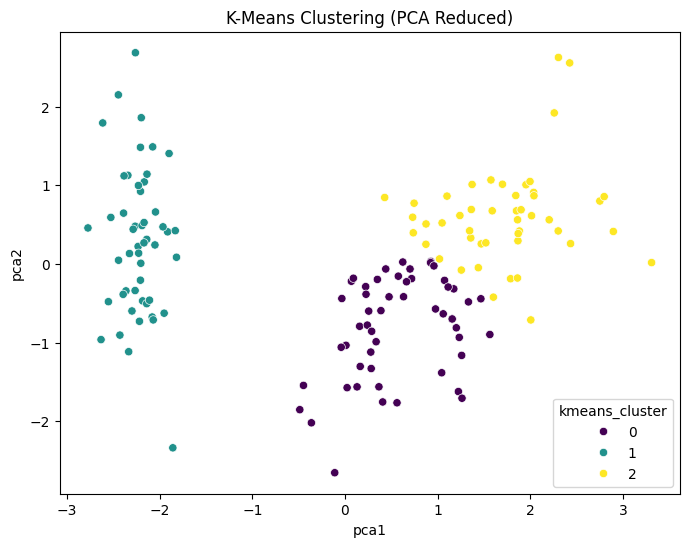

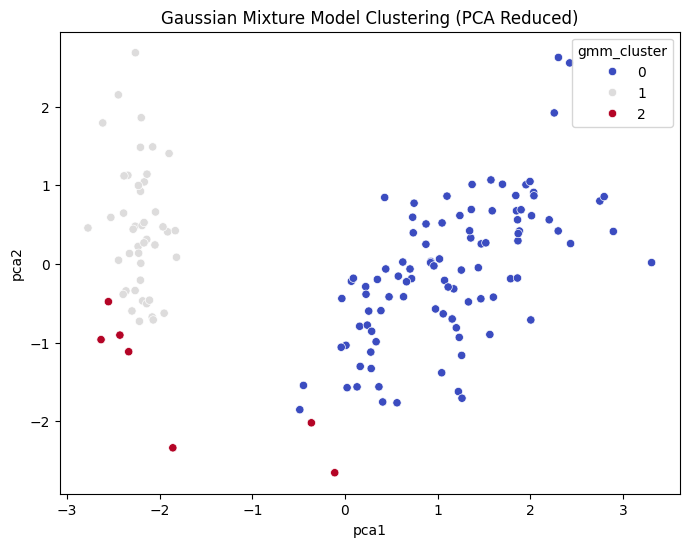

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Load the real-world dataset (Iris dataset)
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Standardizing the dataset
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

### 1. Determine Optimal K Using Elbow Method ###
inertia = []
silhouette_scores = []
K_range = range(2, 7)  # Trying different cluster numbers

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)  # Inertia: sum of squared distances
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', linestyle='--', color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Analysis')
plt.show()

### 2. Apply K-Means with Optimal K ###
best_k = 3  # Based on previous analysis
kmeans = KMeans(n_clusters=best_k, init='k-means++', random_state=42, n_init=20, max_iter=500)
kmeans.fit(df_scaled)
df['kmeans_cluster'] = kmeans.labels_

# Compute final silhouette score
silhouette_avg = silhouette_score(df_scaled, kmeans.labels_)
print(f'Final K-Means Silhouette Score: {silhouette_avg:.2f}')

### 3. Alternative Clustering: Gaussian Mixture Model ###
gmm = GaussianMixture(n_components=best_k, random_state=42)
gmm_labels = gmm.fit_predict(df_scaled)
df['gmm_cluster'] = gmm_labels

# Compute silhouette score for GMM
silhouette_gmm = silhouette_score(df_scaled, gmm_labels)
print(f'Gaussian Mixture Model Silhouette Score: {silhouette_gmm:.2f}')

### 4. Apply PCA for Visualization ###
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)
df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]

# Scatter plot for K-Means clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='kmeans_cluster', palette='viridis')
plt.title('K-Means Clustering (PCA Reduced)')
plt.show()

# Scatter plot for GMM clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='gmm_cluster', palette='coolwarm')
plt.title('Gaussian Mixture Model Clustering (PCA Reduced)')
plt.show()
